In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Validation

In [2]:
# Load data
hall_df, student_df, art_df = sc.load_data()

# Get art_capacity_df.
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df,
                    categories = ["gender","race"])
# Get building_capacity_df.
building_capacity_df = sc.get_building_capacity_df()

# Fill buildings
sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [8]:
df_baseline = pd.DataFrame(index = ["Man","Non-Man","White","Non-White"])
df_optimized = pd.DataFrame(index = ["Man","Non-Man","White","Non-White"])

for i in range(30):
    sc.fill_buildings(student_df = student_df, hall_df = hall_df)
    
    # Get baseline stats.
    bs_gender = sc.baseline_average_value(category = "gender", in_group = "Man")
    bs_race = sc.baseline_average_value(category = "race", in_group = "White")
    df_baseline[i] = list(bs_gender) + list(bs_race)

    # Compute full n_buildings x n_artworks cost matrix.
    cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                        hall_df = hall_df,
                                        categories = ["gender","race"],
                                        alpha = -1,
                                        beta = 100)

    # Reduce cost df to remove duplicate columns.
    cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})
    # Optimize assignment_df
    assignment_df = sc.learn_optimal_assignment(cost_df, 
                                 building_capacity_df, 
                                 art_capacity_df, 
                                 lam = 100) # lambda, you can change this.
    
    # Get optimized stats.
    bs_gender = sc.optimized_average_value(assignment_df, category = "gender", in_group = "Man")
    bs_race = sc.optimized_average_value(assignment_df, category = "race", in_group = "White")
    df_optimized[i] = list(bs_gender) + list(bs_race)
    
df_val = pd.DataFrame(index = df_optimized.index)
df_val["baseline_mean"] = df_baseline.mean(axis = 1)
df_val["baseline_95_CI"] = .975 * np.std(df_baseline, axis =1) / df_optimized.shape[1]
df_val["optimized_mean"] = df_optimized.mean(axis = 1)
df_val["optimized_95_CI"] = .975 * np.std(df_optimized, axis =1) / df_optimized.shape[1]
df_val

,baseline_mean,baseline_95_CI,optimized_mean,optimized_95_CI
Man,12.461671,0.004521,10.533688,0.003755
Non-Man,2.472625,0.000703,4.383154,0.001458
White,13.488615,0.003342,6.898392,0.001702
Non-White,1.599560,0.000581,7.970269,0.002500


,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Man,10.486701,10.486701,10.486701,10.486597,10.486341,10.487525,10.495208,10.495883,10.495878,10.495877,10.495879,10.498857,10.481714,10.468829,10.462250,10.467741,10.468320
Non-Man,4.423796,4.423796,4.423796,4.423902,4.424164,4.422991,4.415397,4.414822,4.414848,4.414852,4.414850,4.411743,4.428595,4.441839,4.448424,4.442910,4.442320
White,6.962060,6.962060,6.962060,6.962057,6.961729,6.960253,6.951565,6.946569,6.946516,6.946531,6.946534,6.948863,6.967042,6.974832,6.981336,6.987427,6.989569
Non-White,7.946759,7.946759,7.946759,7.946762,7.947056,7.948571,7.957341,7.961958,7.962057,7.962050,7.962048,7.959712,7.942060,7.934183,7.928098,7.922550,7.920507


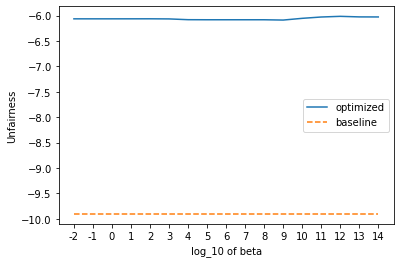

In [7]:
fig, ax = plt.subplots()
ax.plot(df_optimized.loc["Non-Man",:] - df_optimized.loc["Man",:], label = "optimized")
ax.plot(df_baseline.loc["Non-Man",:] - df_baseline.loc["Man",:], linestyle = "--", label = "baseline")

ax.set_xticks(df_optimized.columns)
ax.set_xticklabels(df_optimized.columns)
ax.set_xlabel("log_10 of beta")
ax.set_ylabel("Unfairness")
plt.legend()
plt.show()

In [10]:
cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.093022,0.086409,0.091694,0.091177,0.093001,0.093,0.092368,0.092883,0.092863,0.080568,0.093016
anderson,0.093381,0.085831,0.091904,0.091328,0.09334,0.09337,0.092531,0.093199,0.093166,0.078575,0.093375
ballou,0.093056,0.086481,0.091697,0.091103,0.093035,0.093033,0.092367,0.092917,0.092902,0.080358,0.09305
capen_house,0.09091,0.09091,0.09091,0.09091,0.09091,0.09091,0.09091,0.09091,0.090901,0.09091,0.09091
clic,0.093381,0.085831,0.091904,0.091328,0.09334,0.09337,0.092531,0.093199,0.093166,0.078575,0.093375
dental_school,0.091121,0.090646,0.090924,0.090713,0.091107,0.091118,0.091011,0.091105,0.091093,0.090044,0.091117
eaton_hall,0.092963,0.086708,0.09168,0.091154,0.092942,0.092942,0.092321,0.092831,0.092816,0.080687,0.092956
fine_arts_house,0.093124,0.086286,0.091719,0.091261,0.093082,0.093096,0.092457,0.092982,0.092967,0.079909,0.093117
gifford_house,0.091041,0.090695,0.090961,0.090967,0.091021,0.09104,0.090999,0.091033,0.091031,0.090171,0.091041
goddard_chapel,0.091026,0.090613,0.090929,0.090937,0.091026,0.091024,0.09098,0.091017,0.091017,0.090406,0.091026


In [176]:
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df,
                                    categories = ["gender","race"],
                                    alpha = alpha,
                                    beta = .1)

# Reduce cost df to remove duplicate columns.
cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})
cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anderson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ballou,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
capen_house,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
clic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dental_school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eaton_hall,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fine_arts_house,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gifford_house,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
goddard_chapel,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anderson,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ballou,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
capen_house,0.100154,0.100012,0.100114,0.100043,0.099991,0.100157,0.100133,0.10015,0.0,0.099115,0.10013
clic,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dental_school,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eaton_hall,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fine_arts_house,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gifford_house,0.336659,0.0,0.0,0.0,0.327868,0.0,0.0,0.0,0.0,0.0,0.335473
goddard_chapel,0.336912,0.0,0.0,0.0,0.327448,0.0,0.0,0.0,0.0,0.0,0.33564
